### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# Sense check the data
print(reviews.shape)
print(reviews.dtypes)

# View the DataFrame.
reviews.head()

(2000, 11)
gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object


gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [3]:
# Any missing values?
print(f"Amount of missing values in this dataframe : {reviews.isnull().sum().sum()}")
reviews.isnull().sum()

Amount of missing values in this dataframe : 0


gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [4]:
# Explore the data.
print(reviews.columns)
reviews.info()

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'language', 'platform', 'product',
       'review', 'summary'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: f

In [5]:
# Descriptive statistics.
reviews.describe().round(3)

age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000           2000.000                2000.000        2000.000   
mean     39.495             48.079                  50.000        1578.032   
std      13.573             23.124                  26.095        1283.240   
min      17.000             12.300                   1.000          25.000   
25%      29.000             30.340                  32.000         772.000   
50%      38.000             47.150                  50.000        1276.000   
75%      49.000             63.960                  73.000        1751.250   
max      72.000            112.340                  99.000        6847.000   

         product  
count   2000.000  
mean    4320.522  
std     3148.939  
min      107.000  
25%     1589.250  
50%     3624.000  
75%     6654.000  
max    11086.000

### Observations

## 2. Drop columns

In [6]:
# Drop unnecessary columns.
reviews_subset = reviews.drop(['language','platform'], axis=1)

# View column names.
print(reviews_subset.columns)
reviews_subset.head()

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')


gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education  product                                             review  \
0  graduate      453  When it comes to a DM's screen, the space on t...   
1  graduate      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  graduate      254  Nice art, nice printing.  Why two panels are f...   
3  graduate      263  Amazing buy! Bought it as a gift for our new d...   
4  graduate      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

## 3. Rename columns

In [7]:
# Rename the column headers.
reviews_subset = reviews_subset.rename(columns={'remuneration (k£)':'remuneration', 
                             'spending_score (1-100)':'spending_score'})

# View column names.
print(reviews_subset.columns)
reviews_subset.head()

Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')


gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

## 4. Save the DataFrame as a CSV file

In [8]:
# Create a CSV file as output.
# Index = false to drop 'Unnamed: 0' column
reviews_subset.to_csv('turtle_reviews_cleaned.csv',index=False)

In [9]:
# Import new CSV file with Pandas.
reviews_final = pd.read_csv('turtle_reviews_cleaned.csv')

# Sense check the data
print(reviews_final.shape)
print(reviews_final.dtypes)
print(reviews_final.columns)

# View DataFrame.
reviews_final.head()

(2000, 9)
gender             object
age                 int64
remuneration      float64
spending_score      int64
loyalty_points      int64
education          object
product             int64
review             object
summary            object
dtype: object
Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')


gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

## 5. Linear regression

### 5a) spending vs loyalty

Text(0, 0.5, 'Loyalty Points')

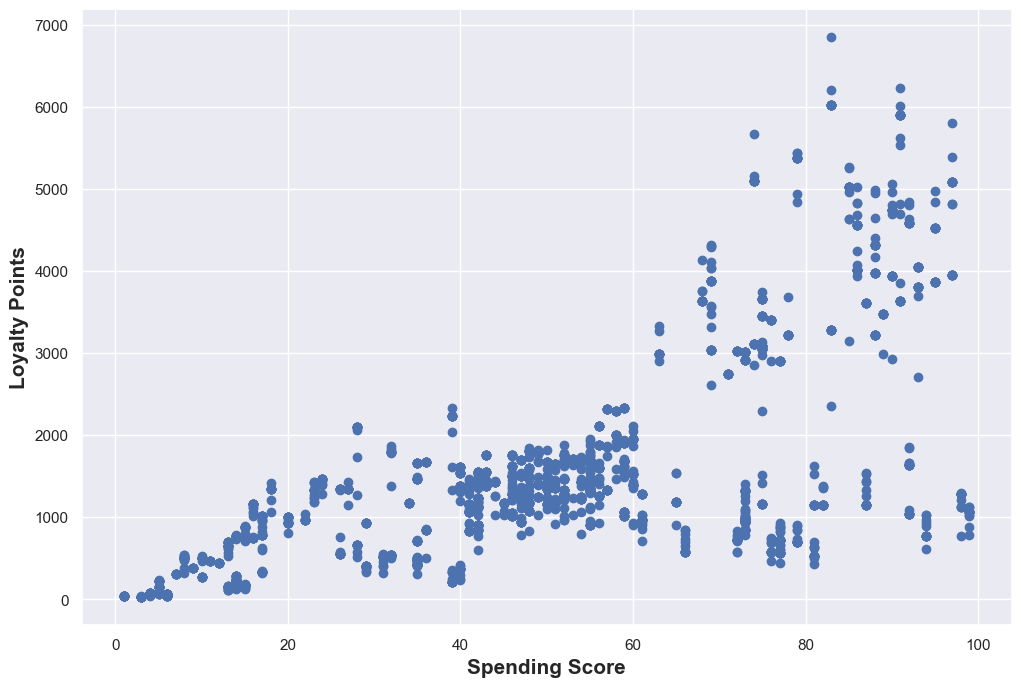

In [10]:
# Independent variable.
x = reviews_final['spending_score']

# Dependent variable.
y = reviews_final['loyalty_points']

# Set figure size.
sns.set(rc={'figure.figsize':(12, 8)})

# Scatterplot to check for linearity
plt.scatter(x, y)

# Insert labels.
plt.xlabel('Spending Score', fontweight='bold', fontsize=15)
plt.ylabel('Loyalty Points', fontweight='bold', fontsize=15)

In [11]:
# Run the OLS test.
f = 'y ~ x'
test = ols(f, data=reviews_final).fit()

# View the output
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          2.92e-263
Time:                        13:46:00   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# Extract the estimated parameters.
print("Parameters:", test.params) 

# Extract the standard errors.
print("Standard errors:", test.bse)  

# Extract the predicted values.
print("Predicted values:", test.predict())

Parameters: Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors: Intercept    45.930554
x             0.814419
dtype: float64
Predicted values: [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [13]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (-75.0527) + 33.0617 * reviews_final['spending_score']

# View the output.
y_pred.to_frame()

spending_score
0          1214.3536
1          2602.9450
2           123.3175
3          2470.6982
4          1247.4153
...              ...
1995       2206.2046
1996        189.4409
1997       2933.5620
1998        453.9345
1999        189.4409

[2000 rows x 1 columns]

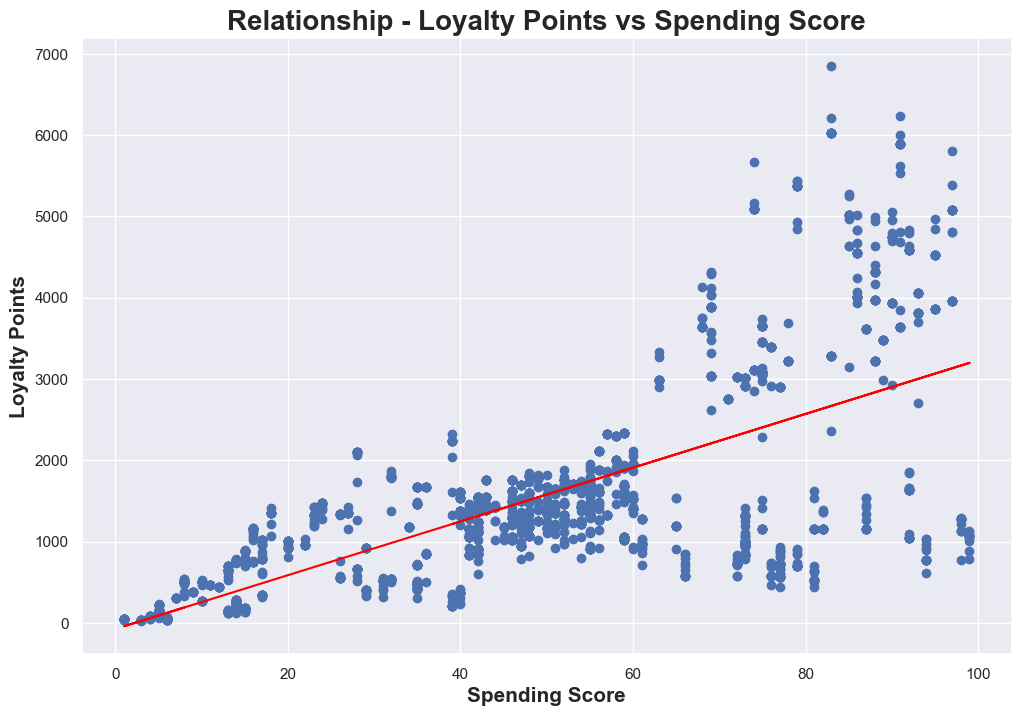

In [14]:
# Plot the graph with a regression line.
plt.scatter(x, y)
plt.plot(x, y_pred, color = 'red')

# Insert labels and title. 
plt.title('Relationship - Loyalty Points vs Spending Score',
          fontweight='bold', fontsize=20)
plt.xlabel('Spending Score', fontweight='bold', fontsize=15)
plt.ylabel('Loyalty Points', fontweight='bold', fontsize=15)

# Save the plot. 
plt.savefig('Relationship - Loyalty Points vs Spending Score')

# View the plot. 
plt.show()

### 5b) renumeration vs loyalty

Text(0, 0.5, 'Loyalty Points')

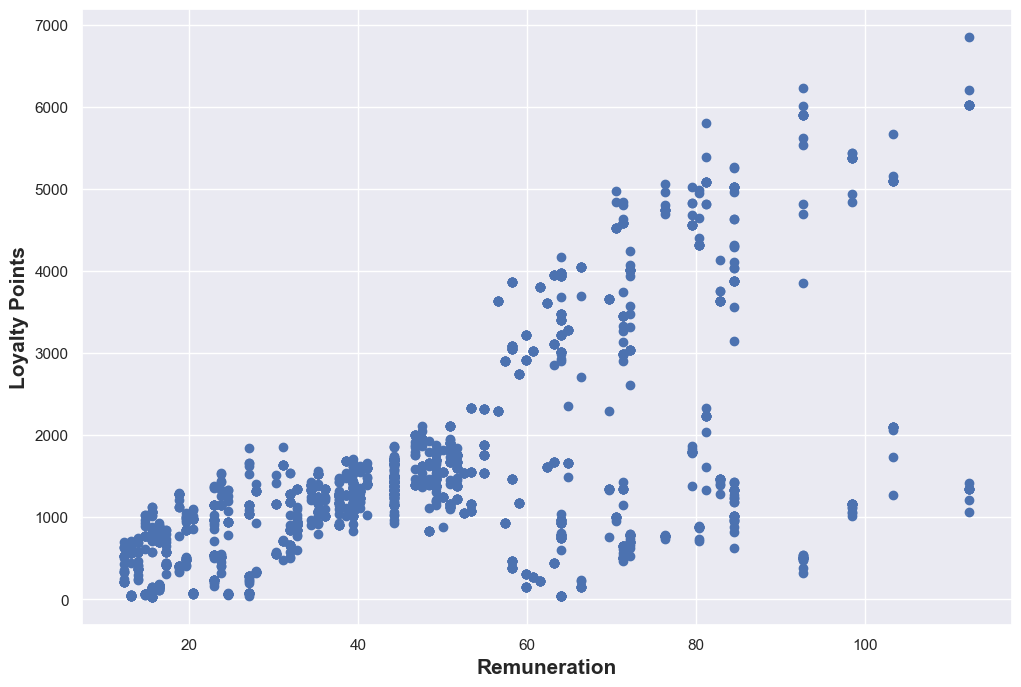

In [15]:
# Independent variable.
x = reviews_final['remuneration']

# Dependent variable.
y = reviews_final['loyalty_points']

# Scatterplot to check for linearity
plt.scatter(x, y)

# Insert labels.
plt.xlabel('Remuneration', fontweight='bold', fontsize=15)
plt.ylabel('Loyalty Points', fontweight='bold', fontsize=15)

In [16]:
# Run the OLS test.
f = 'y ~ x'
test = ols(f, data=reviews_final).fit()

# View the output.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          2.43e-209
Time:                        13:46:01   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# Extract the estimated parameters.
print("Parameters:", test.params) 

# Extract the standard errors.
print("Standard errors:", test.bse)  

# Extract the predicted values.
print("Predicted values:", test.predict())

Parameters: Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors: Intercept    52.170717
x             0.977925
dtype: float64
Predicted values: [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [18]:
# Set the the X coefficient and the constant to generate the regression table.
y_pred = (-65.6865) + 34.1878 * reviews_final['remuneration']

# View the output.
y_pred.to_frame()

remuneration
0       354.823440
1       354.823440
2       382.857436
3       382.857436
4       410.891432
...            ...
1995   2821.815088
1996   3102.155048
1997   3102.155048
1998   3298.393020
1999   3102.155048

[2000 rows x 1 columns]

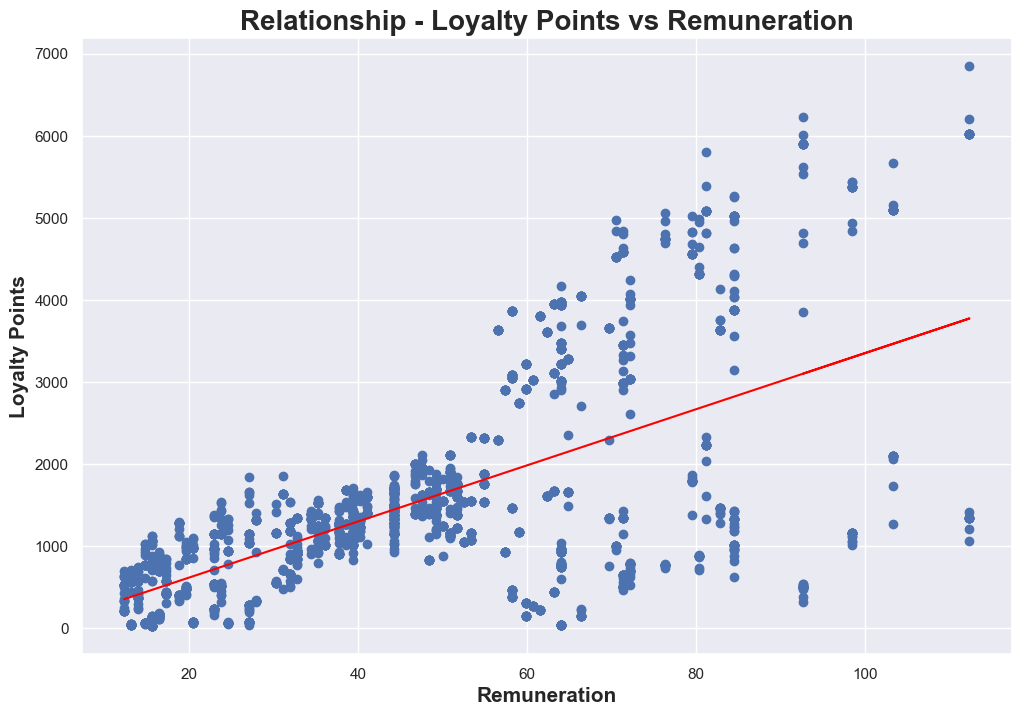

In [19]:
# Plot the graph with a regression line.
plt.scatter(x, y)
plt.plot(x, y_pred, color = 'red')

# Insert labels and title.
plt.title('Relationship - Loyalty Points vs Remuneration',
          fontweight='bold', fontsize=20)
plt.xlabel('Remuneration', fontweight='bold', fontsize=15)
plt.ylabel('Loyalty Points', fontweight='bold', fontsize=15)

# Save the plot. 
plt.savefig('Relationship - Loyalty Points vs Remuneration')

# View the plot. 
plt.show()

### 5c) age vs loyalty

Text(0, 0.5, 'Loyalty Points')

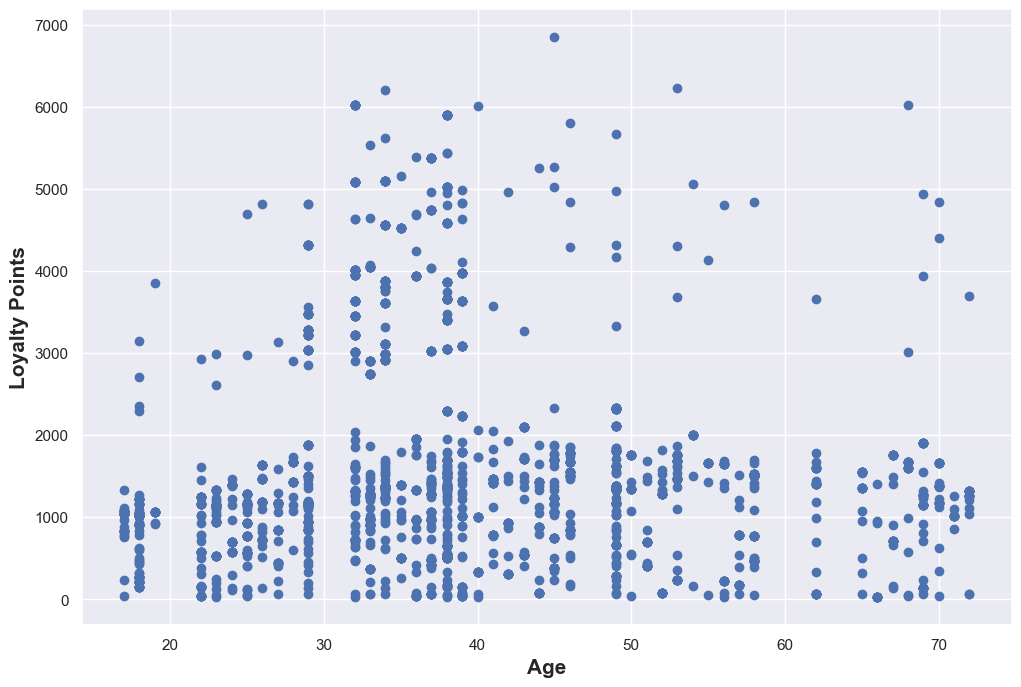

In [20]:
# Independent variable.
x = reviews_final['age']

# Dependent variable.
y = reviews_final['loyalty_points']

# Scatterplot to check for linearity.
plt.scatter(x, y)

# Insert labels.
plt.xlabel('Age', fontweight='bold', fontsize=15)
plt.ylabel('Loyalty Points', fontweight='bold', fontsize=15)

In [21]:
# Run the OLS test.
f = 'y ~ x'
test = ols(f, data=reviews_final).fit()

# View the output.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Mon, 24 Jul 2023   Prob (F-statistic):             0.0577
Time:                        13:46:01   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# Extract the estimated parameters.
print("Parameters:", test.params)

# Extract the standard errors.
print("Standard errors:", test.bse)

# Extract the predicted values.
print("Predicted values:", test.predict())

Parameters: Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors: Intercept    88.248731
x             2.113177
dtype: float64
Predicted values: [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [23]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = 1736.5177 + (-4.0128 * reviews_final['age'])

# View the output.
y_pred.to_frame()

age
0     1664.2873
1     1644.2233
2     1648.2361
3     1636.1977
4     1604.0953
...         ...
1995  1588.0441
1996  1563.9673
1997  1600.0825
1998  1600.0825
1999  1608.1081

[2000 rows x 1 columns]

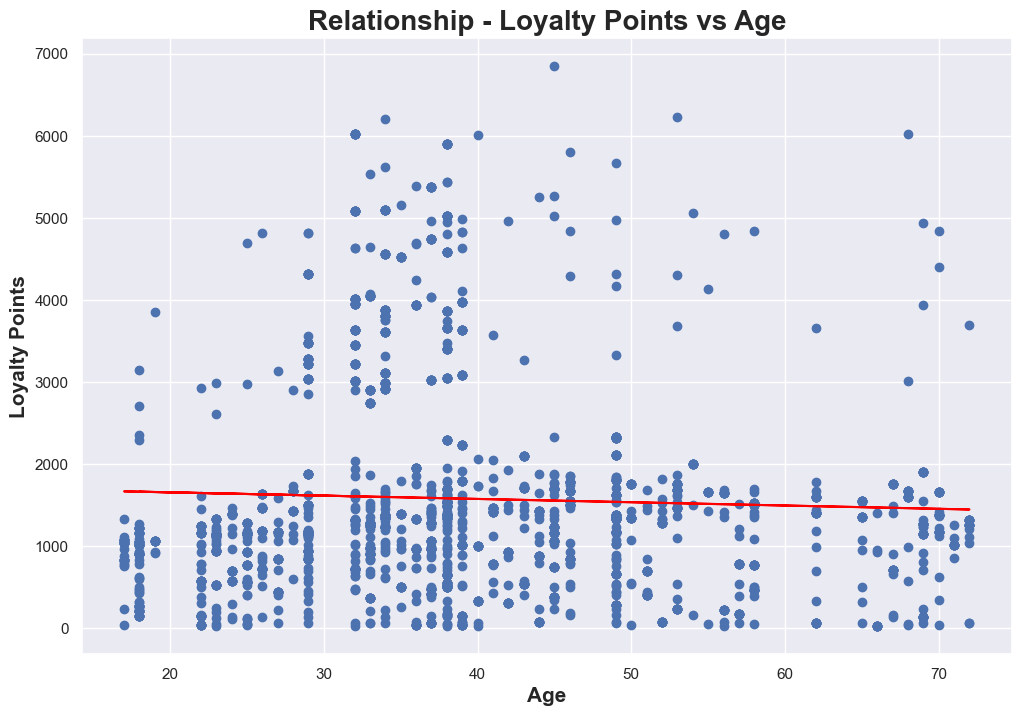

In [24]:
# Plot the graph with a regression line.
plt.scatter(x, y)
plt.plot(x, y_pred, color = 'red')

# Insert labels and title. 
plt.title('Relationship - Loyalty Points vs Age',
          fontweight='bold', fontsize=20)
plt.xlabel('Age', fontweight='bold', fontsize=15)
plt.ylabel('Loyalty Points', fontweight='bold', fontsize=15)


# Save the plot. 
plt.savefig('Relationship - Loyalty Points vs Age')

# View the plot.
plt.show()

## 6. Observations and insights

***Your observations here...***






For loyalty points vs spending we had an $R^2$ value of 45.2% suggesting there is some correlation/relationship between the two variables. Whilst the figure suggests there is 54.8% of the variation still unexplained, it helps to understand that the more a customer spends the higher their loyalty points are likely to be. 

Similarly, this is the case for the correlation/relationship between loyalty points and remuneration, however less significant with a $R^2$ value of 38.0%.

Looking at the correlation/relationship between loyalty points and age we see there is no relationship between the two variables with a $R^2$ value of 0.2%.

In summary, we could use spending and remuneration against loyalty points, however, the $R^2$ values are both below 50% indicating there is some sort of minimal relationship. We can confidently exclude age aas no relationship exists with loyalty points. 

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [25]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [26]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv('turtle_reviews_cleaned.csv')

# Sense check the data
print(df2.shape)
print(df2.dtypes)
print(df2.columns)

# View the DataFrame.
df2.head()

(2000, 9)
gender             object
age                 int64
remuneration      float64
spending_score      int64
loyalty_points      int64
education          object
product             int64
review             object
summary            object
dtype: object
Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')


gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [27]:
# Drop unnecessary columns.
df2 = df2.drop(columns = ['gender', 'age', 'loyalty_points', 'education',
                    'product', 'review', 'summary'])

# View DataFrame.
df2.head()

remuneration  spending_score
0         12.30              39
1         12.30              81
2         13.12               6
3         13.12              77
4         13.94              40

In [28]:
# Explore the data.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [29]:
# Descriptive statistics.
df2.describe().round(3)

remuneration  spending_score
count      2000.000        2000.000
mean         48.079          50.000
std          23.124          26.095
min          12.300           1.000
25%          30.340          32.000
50%          47.150          50.000
75%          63.960          73.000
max         112.340          99.000

## 2. Plot

Text(0, 0.5, 'Spending score')

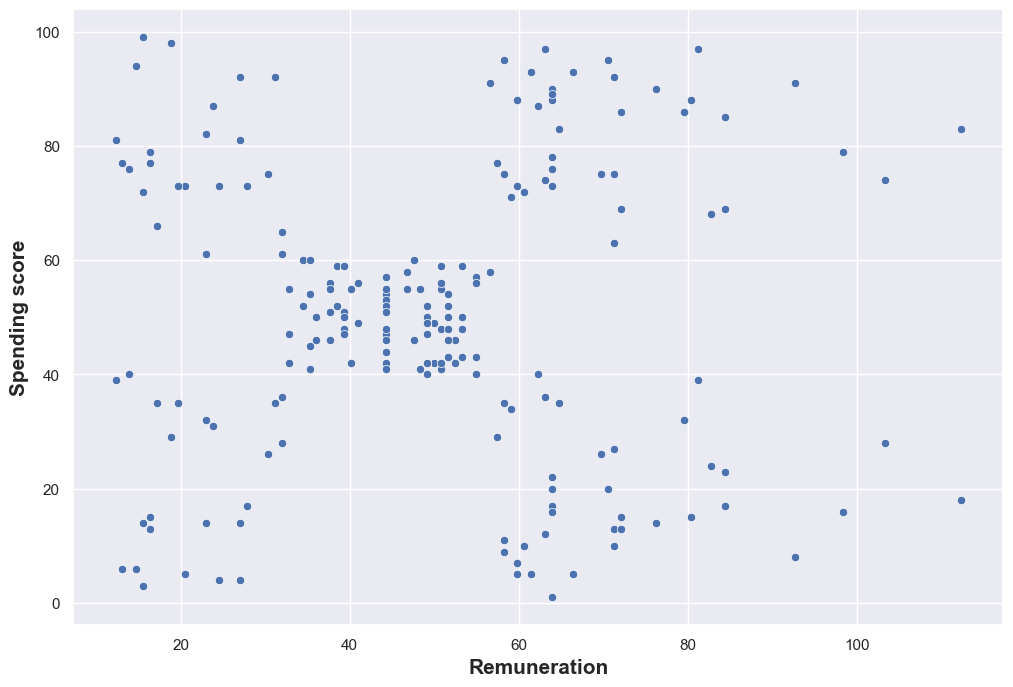

In [30]:
# Create a scatterplot with Seaborn.
ax = sns.scatterplot(x='remuneration',
                y='spending_score',
                data=df2)

# Insert labels.
ax.set_xlabel('Remuneration', fontweight='bold', fontsize=15)
ax.set_ylabel('Spending score', fontweight='bold', fontsize=15)

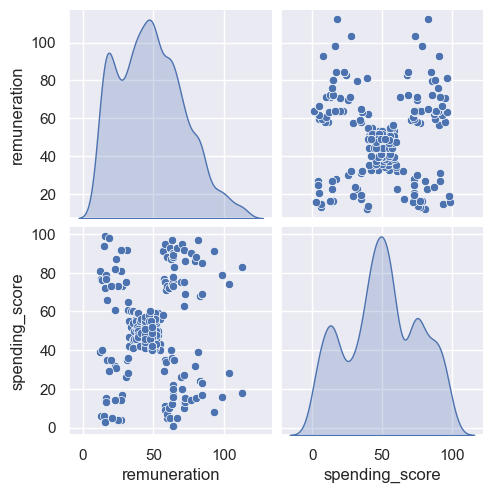

In [31]:
# Create a pairplot with Seaborn.
X = df2[['remuneration', 'spending_score']]

sns.pairplot(df2,
             vars=X,
             diag_kind='kde')

## 3. Elbow and silhoutte methods

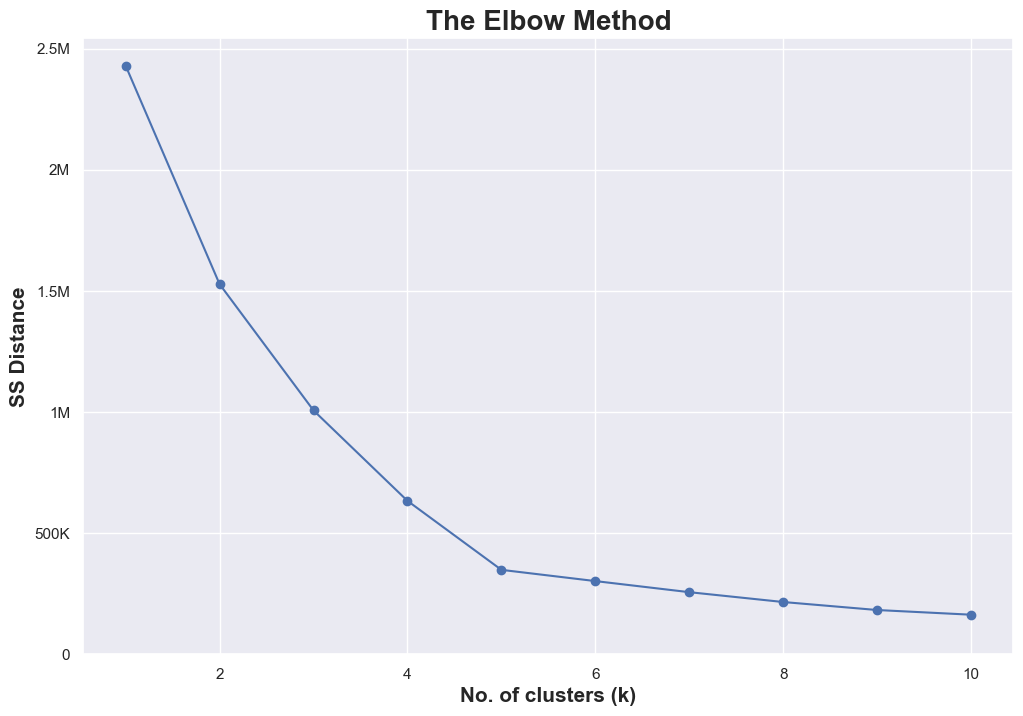

In [32]:
# Determine the number of clusters: Elbow method.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(X)
    ss.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 11),
         ss,
         marker='o')

# Insert labels and title.
plt.title('The Elbow Method', fontweight='bold', fontsize=20)
plt.xlabel('No. of clusters (k)', fontweight='bold', fontsize=15)
plt.ylabel('SS Distance', fontweight='bold', fontsize=15)
ytick_labels = ['0', '500K', '1M', '1.5M', '2M', '2.5M']
ytick_positions = [0, 500000, 1000000, 1500000, 2000000, 2500000]
plt.yticks(ytick_positions, ytick_labels)

# Visualise the graph
plt.show()

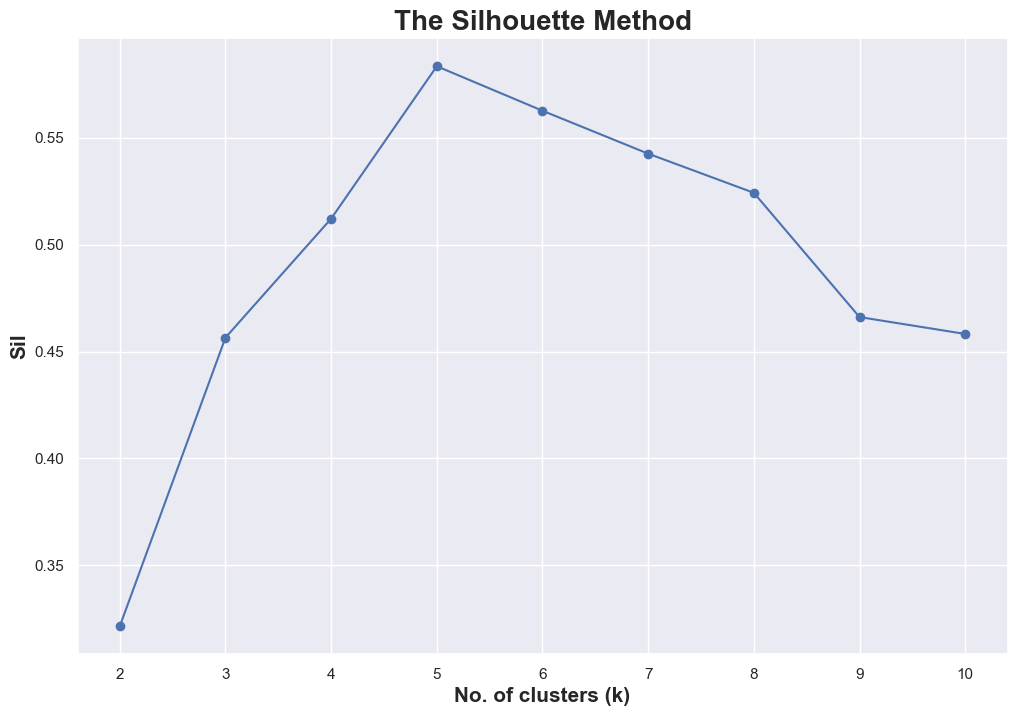

In [33]:
# Determine the number of clusters: Silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(X)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(X,
                                labels,
                                metric = 'euclidean'))
    
# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title('The Silhouette Method', fontweight='bold', fontsize=20)
plt.xlabel('No. of clusters (k)', fontweight='bold', fontsize=15)
plt.ylabel('Sil', fontweight='bold', fontsize=15)

# Visualise the graph
plt.show()

## 4. Evaluate k-means model at different values of *k*

### - Evaluate 4 clusters

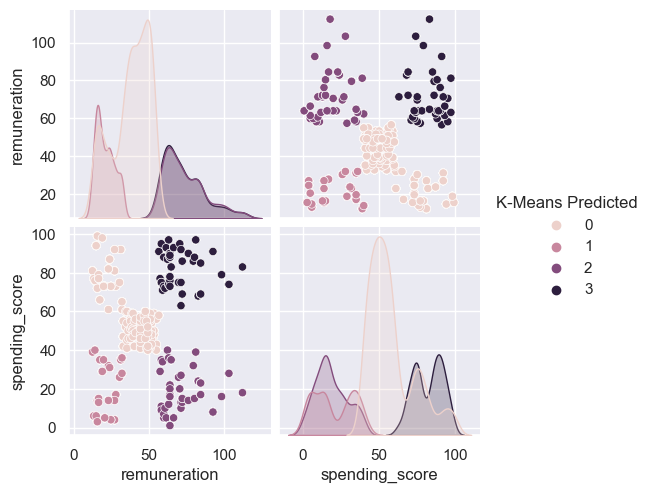

In [34]:
# Use 4 clusters:
kmeans = KMeans(n_clusters = 4,
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(X)

clusters = kmeans.labels_
X['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(X, hue='K-Means Predicted',
             diag_kind= 'kde')

In [35]:
# Number of observations per predicted class.
X['K-Means Predicted'].value_counts().to_frame()

K-Means Predicted
0               1013
3                356
2                351
1                280

In [36]:
# View the K-Means predicted.
X.head()

remuneration  spending_score  K-Means Predicted
0         12.30              39                  1
1         12.30              81                  0
2         13.12               6                  1
3         13.12              77                  0
4         13.94              40                  1

### - Evaluate 6 clusters

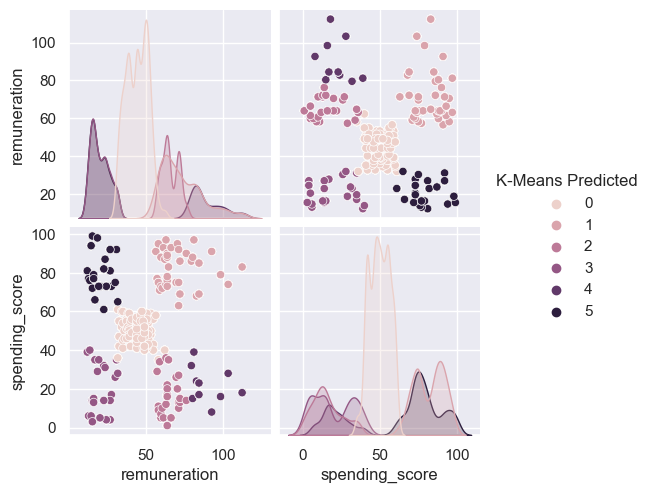

In [37]:
# Use 6 clusters:
kmeans = KMeans(n_clusters = 6,
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(X)

clusters = kmeans.labels_
X['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(X, hue='K-Means Predicted',
             diag_kind= 'kde')

In [38]:
# Number of observations per predicted class.
X['K-Means Predicted'].value_counts().to_frame()

K-Means Predicted
0                767
1                356
3                271
5                269
2                214
4                123

In [39]:
# View the K-Means predicted.
X.head()

remuneration  spending_score  K-Means Predicted
0         12.30              39                  3
1         12.30              81                  5
2         13.12               6                  3
3         13.12              77                  5
4         13.94              40                  3

## 5. Fit final model and justify your choice

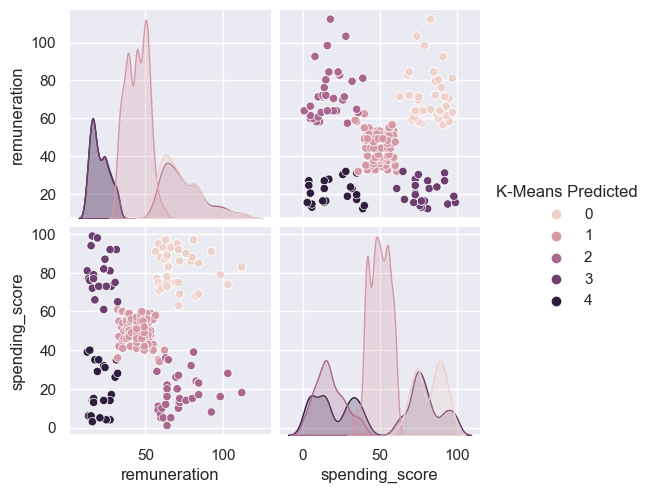

In [40]:
# Apply the final model. 5 clusters
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(X)

clusters = kmeans.labels_
X['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(X, hue='K-Means Predicted', 
             diag_kind= 'kde')

In [41]:
# Check the number of observations per predicted class.
X['K-Means Predicted'].value_counts().to_frame()

K-Means Predicted
1                774
0                356
2                330
4                271
3                269

## 6. Plot and interpret the clusters

In [42]:
# View the K-Means predicted.
X.head()

remuneration  spending_score  K-Means Predicted
0         12.30              39                  4
1         12.30              81                  3
2         13.12               6                  4
3         13.12              77                  3
4         13.94              40                  4

<Axes: xlabel='remuneration', ylabel='spending_score'>

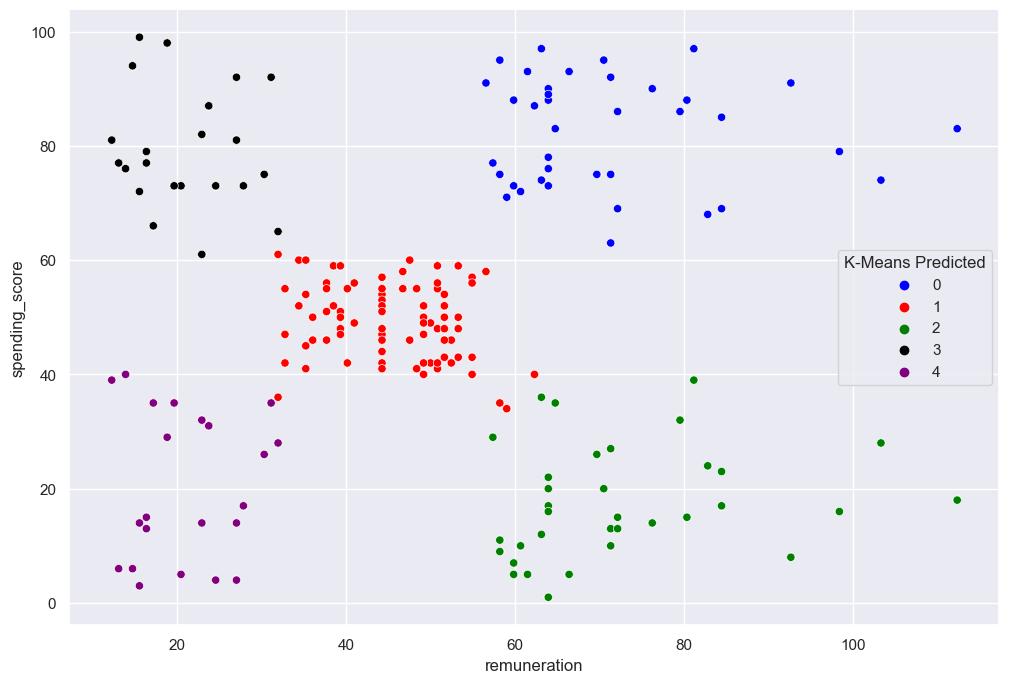

In [43]:
# Visualising the clusters.
sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=X ,
                hue='K-Means Predicted',
                palette=['blue', 'red', 'green', 'black', 'purple'])

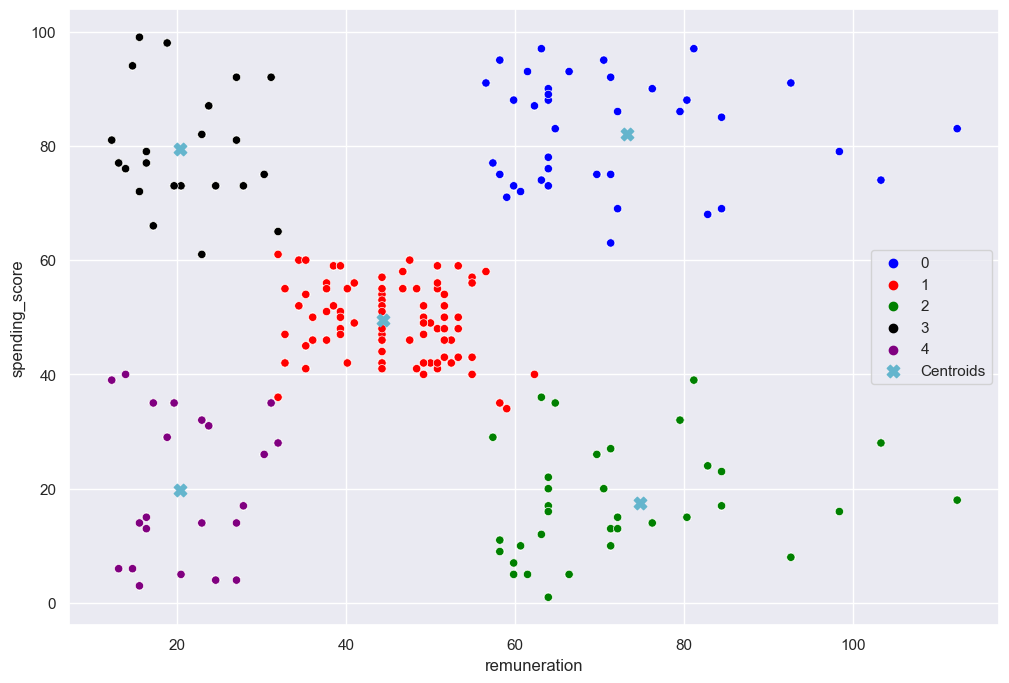

In [44]:
# Visualising the clusters with centroids.
sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=X,
                hue='K-Means Predicted',
                palette=['blue', 'red', 'green', 'black', 'purple'])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="c", s=80, label="Centroids")
plt.legend()
plt.show()

## 7. Discuss: Insights and observations

***Your observations here...***

Using the Elbow method, it was determined that when exploring the relationship between remuneration and spending score the appropriate number of clusters for this dataset was either four or five. After evaluating the Silhouette method we could determine that five clusters would be the most appropriate number of clusters. 

When plotting the final scatterplot we can see the data points make 5 perfect clusters further confirming this is the correct number of clusters.

Plotting the centroids we can see that (Cluster 1 - red) has the most compact cluster with data points being close to the mean of the cluster, whilst (Cluster 0 - blue) and (Cluster 2 - green) have the most dispersed data points from the mean.

Looking at the clusters more closely there is definitely an opportunity for the marketing team to target the group with high remuneration and a low spending score (Cluster 2 - green), there is potential for them to spend more at Turtle Games. Perhaps analysing and investigating what worked with high remuneration and high spending score (Cluster 0 - blue) could help this cluster spend more. 

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [45]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [46]:
# Load the data set as df3.
df3 = pd.read_csv('turtle_reviews_cleaned.csv')

# View DataFrame.
df3.head()

gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [47]:
# Explore data set.
print(df3.info())
df3.describe().round(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB
None


age  remuneration  spending_score  loyalty_points    product
count  2000.000      2000.000        2000.000        2000.000   2000.000
mean     39.495        48.079          50.000        1578.032   4320.522
std      13.573        23.124          26.095        1283.240   3148.939
min      17.000        12.300           1.000          25.000    107.000
25%      29.000        30.340          32.000         772.000   1589.250
50%      38.000        47.150          50.000        1276.000   3624.000
75%      49.000        63.960          73.000        1751.250   6654.000
max      72.000       112.340          99.000        6847.000  11086.000

In [48]:
# Keep necessary columns. Drop unnecessary columns.
df3 = df3.drop(['gender', 'age', 'remuneration', 'spending_score', 
                'loyalty_points', 'education', 'product'], axis = 1)

# View DataFrame.
df3

review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 2 columns]

In [49]:
# Determine if there are any missing values.
print(f"Amount of missing values in this dataframe : {df3.isnull().sum().sum()}")
df3.isnull().sum()

Amount of missing values in this dataframe : 0


review     0
summary    0
dtype: int64

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [50]:
# Review: Change all to lower case and join with a space.
df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# View output.
df3['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [51]:
# Summary: Change all to lower case and join with a space.
df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# View output.
df3['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [52]:
# Replace all the punctuations in review column.
df3['review'] = df3['review'].str.replace('[^\w\s]','')

# View output.
df3['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [53]:
# Replace all the punctuations in summary column.
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

# View output.
df3['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [54]:
# View shape of DataFrame
df3.shape

(2000, 2)

In [55]:
# Number of duplicates
print(df3.summary.duplicated().sum())
df3.review.duplicated().sum()

649


50

In [56]:
# Drop duplicates in both columns.
df3 = df3.drop_duplicates(subset=['summary'])
df3 = df3.drop_duplicates(subset=['review'])
df3.reset_index(drop=True, inplace=True)

# View DataFrame.
print(df3.shape)
df3.head()

(1350, 2)


review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap

In [57]:
# Sense check duplicates
print(df3.summary.duplicated().sum())
df3.review.duplicated().sum()

0


0

## 3. Tokenise and create wordclouds

In [58]:
# Create new DataFrame (copy DataFrame).
df3_final = df3.copy()

# View DataFrame.
df3_final.head()

review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap

In [59]:
# Review: Create a word cloud.
# Create an empty string variable.
all_reviews = ''
for i in range(df3_final.shape[0]):
    # Add each comment.
    all_reviews = all_reviews + df3_final['review'][i]

In [60]:
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width=1600,height=900,
                       background_color ='white',
                       colormap='plasma', 
                       stopwords='none',
                       min_font_size=10).generate(all_reviews)

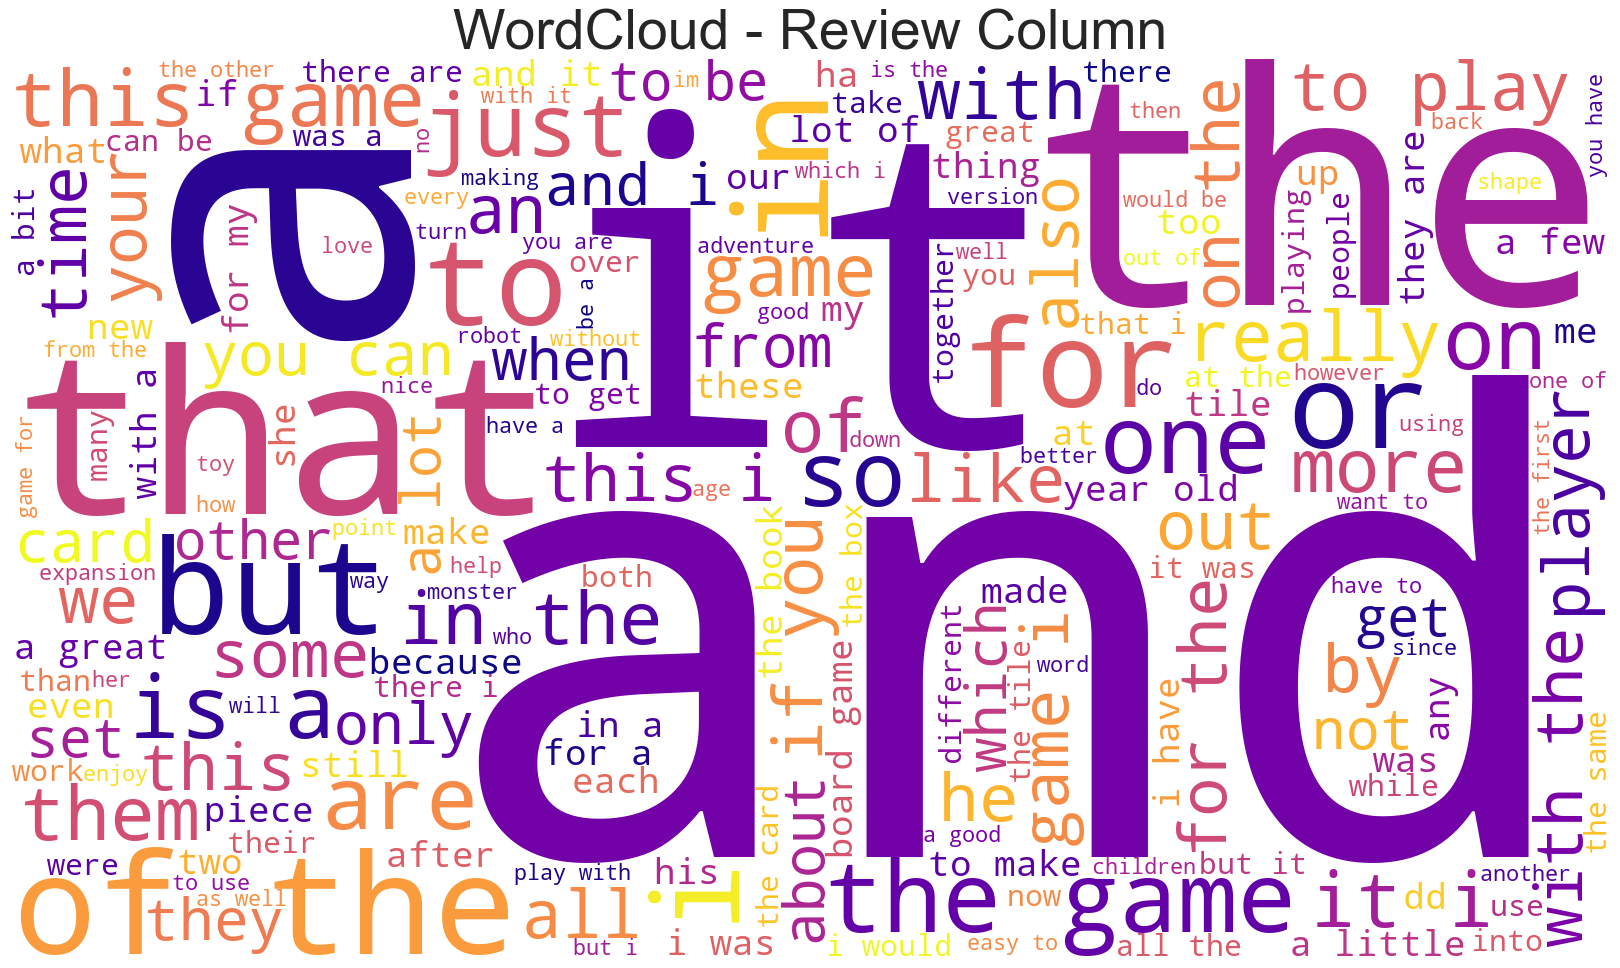

In [61]:
# Review: Plot the WordCloud image.                  
plt.figure(figsize=(16,9),facecolor=None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad=0) 
plt.title('WordCloud - Review Column',size=40)
plt.show()

In [62]:
# Summary: Create a word cloud.
# Create an empty string variable.
all_summary = ''
for i in range(df3_final.shape[0]):
    # Add each comment.
    all_summary = all_summary + df3_final['summary'][i]

In [63]:
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width=1600,height=900,
                       background_color='white',
                       colormap='plasma',
                       stopwords='none',
                       min_font_size=10).generate(all_summary) 

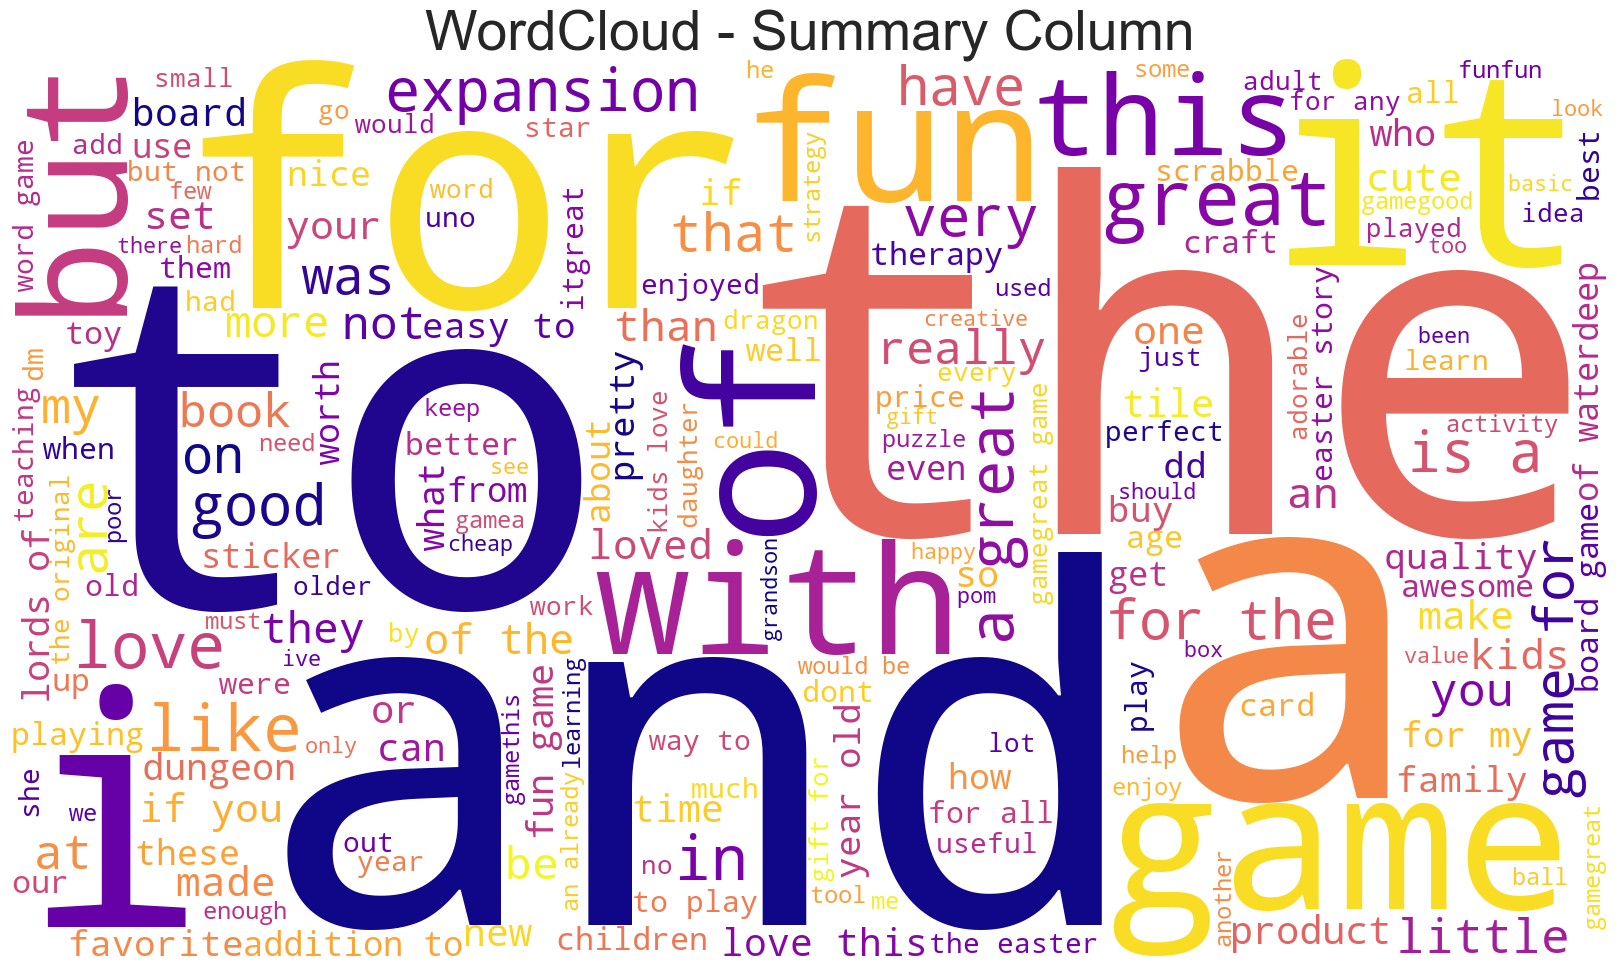

In [64]:
# Summary: Plot the WordCloud image.
plt.figure(figsize=(16,9),facecolor=None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad=0) 
plt.title('WordCloud - Summary Column',size=40)
plt.show()

In [65]:
# Apply tokenisation to both columns.
df3_final['review'] = df3_final['review'].apply(word_tokenize)
df3_final['summary'] = df3_final['summary'].apply(word_tokenize)

# View DataFrame.
df3_final.head()

review  \
0  [when, it, comes, to, a, dms, screen, the, spa...   
1  [an, open, letter, to, galeforce9, your, unpai...   
2  [nice, art, nice, printing, why, two, panels, ...   
3  [amazing, buy, bought, it, as, a, gift, for, o...   
4  [as, my, review, of, gf9s, previous, screens, ...   

                                             summary  
0  [the, fact, that, 50, of, this, space, is, was...  
1  [another, worthless, dungeon, masters, screen,...  
2               [pretty, but, also, pretty, useless]  
3                                      [five, stars]  
4                                      [money, trap]

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [66]:
# Define an empty list of tokens for review column.
all_tokens_review = []

for i in range(df3_final.shape[0]):
    # Add each token to the list.
    all_tokens_review = all_tokens_review + df3_final['review'][i]

In [67]:
# Determine the frequency distribution.
freqdist_reviews = FreqDist(all_tokens_review)

# View output.
freqdist_reviews

FreqDist({'the': 5019, 'and': 2934, 'to': 2843, 'a': 2829, 'of': 2261, 'i': 1887, 'it': 1830, 'is': 1593, 'this': 1549, 'for': 1360, ...})

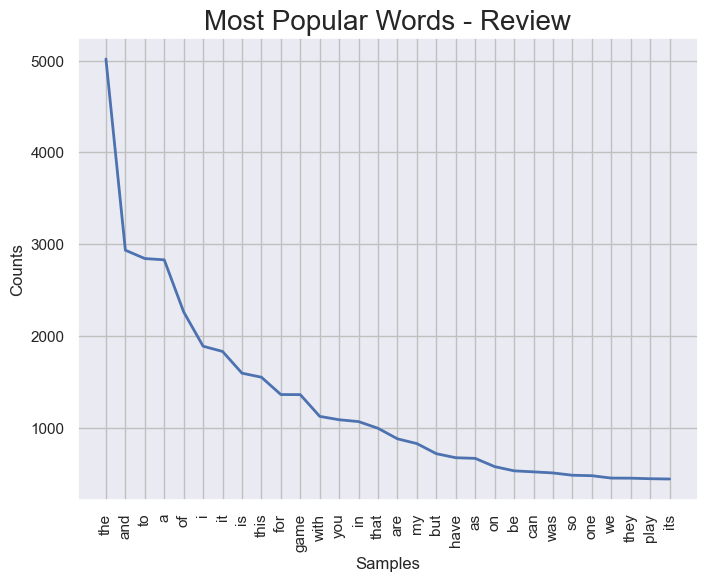

In [68]:
# Plot the frequency distribution.
fig, ax = plt.subplots(dpi=100)
fig.set_size_inches(8, 6)
plt.title("Most Popular Words - Review",fontsize=20)

# Plot the data set.
freqdist_reviews.plot(30, cumulative=False)

# Display the result.
plt.show()

In [69]:
# Define an empty list of tokens for summary column.
all_tokens_summary = []

for i in range(df3_final.shape[0]):
    # Add each token to the list.
    all_tokens_summary = all_tokens_summary + df3_final['summary'][i]

In [70]:
# Determine the frequency distribution.
freqdist_summary = FreqDist(all_tokens_summary)

# Preview data.
freqdist_summary

FreqDist({'game': 268, 'the': 257, 'a': 238, 'great': 237, 'for': 229, 'to': 192, 'fun': 175, 'and': 168, 'it': 139, 'of': 131, ...})

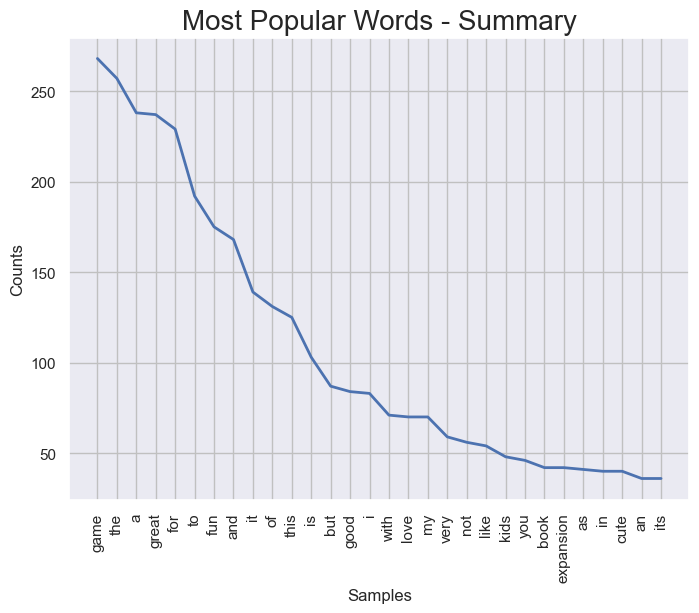

In [71]:
# Plot the frequency distribution
fig, ax = plt.subplots(dpi=100)
fig.set_size_inches(8, 6)
plt.title("Most Popular Words - Summary",fontsize=20)

# Plot the data set.
freqdist_summary.plot(30, cumulative=False)

# Display the result.
plt.show()

### 4b) Remove alphanumeric characters and stopwords

In [72]:
# Delete all the alpanum.
tokens_clean_review = [word for word in all_tokens_review if word.isalnum()]
tokens_clean_summary = [word for word in all_tokens_summary if word.isalnum()]

In [73]:
# Remove all the stopwords
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words.
tokens_final_review = [x for x in tokens_clean_review if x.lower() not in english_stopwords]
tokens_final_summary = [x for x in tokens_clean_summary if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens_final_review_string = ''
tokens_final_summary_string = ''

for value in tokens_final_review:
    # Add each filtered token word to the review string.
    tokens_final_review_string = tokens_final_review_string + value + ' '
    
for value in tokens_final_summary:
    # Add each filtered token word to the summary string.
    tokens_final_summary_string = tokens_final_summary_string + value + ' '

In [74]:
# String excluding alphanumeric characters and stopwords.
tokens_final_review_string

'comes dms screen space screen absolute premium fact 50 space wasted art terribly informative needed art well makes completely useless reason gave 2 stars 1 technically speaking least still stand block notes dice rolls drops ball completely open letter galeforce9 unpainted miniatures bad spell cards great board games meh dm screens however freaking terrible im still waiting single screen isnt polluted pointless artwork useful referenceable tables youve created single use screen useful running storm kings thunder adventure even despite fact geared adventure path usefulness negligible best massive swath inner panel wasted artwork bloated overland map could easily reduced single panel size table nighuseless short stop making crap dm screens nice art nice printing two panels filled general forgotten realms map beyond one blue ocean waste dont understand cant make dm screens useful kinds adventures rather solely specific adventure youre supposed able transpose adventure lands outside forgot

In [75]:
# String excluding alphanumeric characters and stopwords.
tokens_final_summary_string

'fact 50 space wasted art terribly informative needed art another worthless dungeon masters screen galeforce9 pretty also pretty useless five stars money trap best gm screen ever great could even better another missed opportunity value add product line love map general dm screen weak game fell completely flat good book buckley card mommer advanced good gets better know youre getting dont bother worst value ive ever seen enough product good product temporary tattoos good gift huge hit gorgeous pictures wonderful designs wow great coloring book nice book great pictures perfect well done relaxation beautiful coloring book pictures great ive done one gave great buy cant wait work book stained glass perfection four stars beautiful nice three stars like every image contained stained glass coloring book creative stained glass pictures nice pictures great transaction drawings nice put windows great 30 minute toy great ok best fun robot themed gift 6 yr old great party thank bag addition tiny b

### 4c) Create wordcloud without stopwords

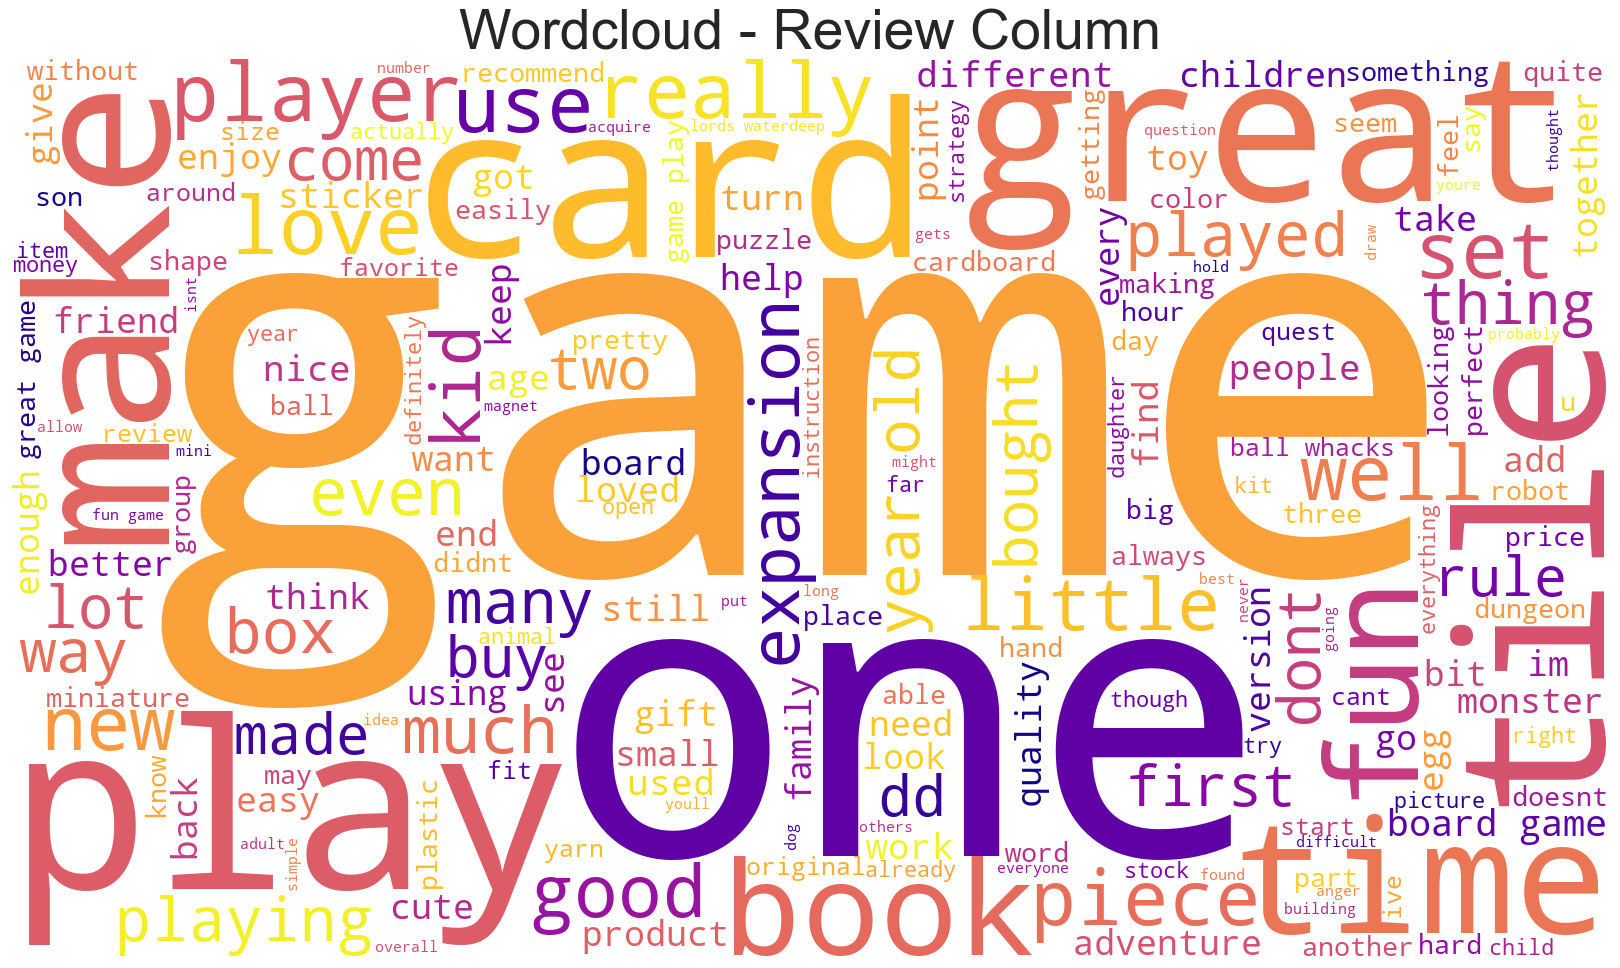

<Figure size 1200x800 with 0 Axes>

In [76]:
# Create a WordCloud without stop words for review column.
wordcloud = WordCloud(width=1600, height=900,
                      background_color='white',
                      colormap='plasma',
                      min_font_size=10).generate(tokens_final_review_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16,9),facecolor=None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad=0)
plt.title('Wordcloud - Review Column',size=40)
plt.show()
plt.savefig('WordCloud - Review Column')

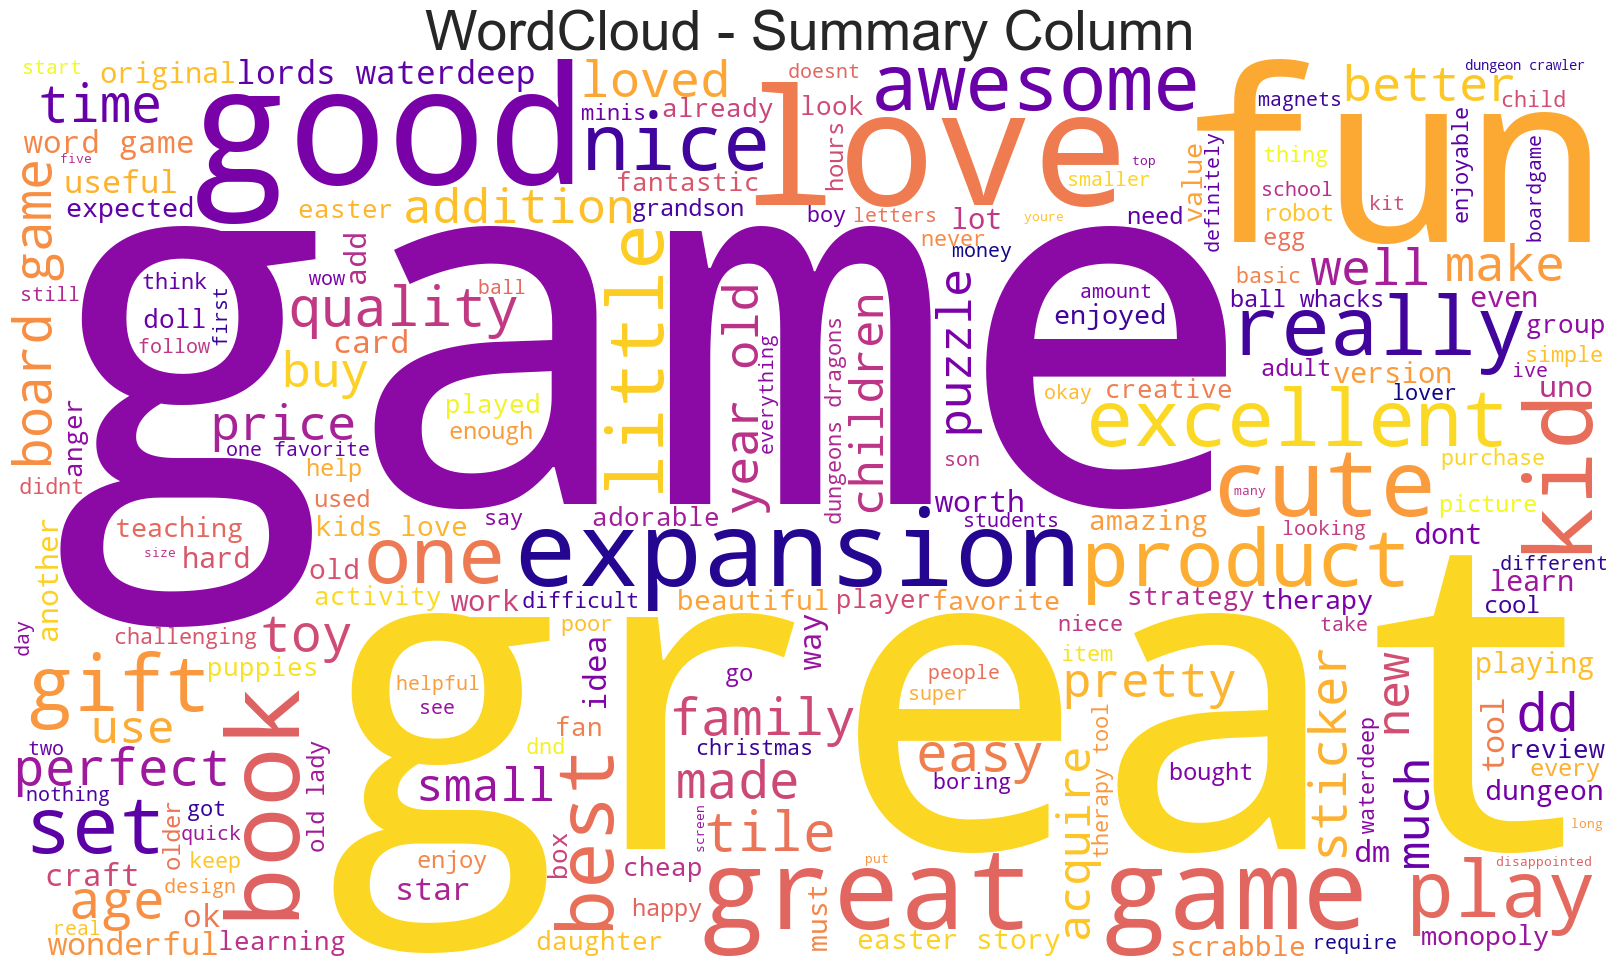

<Figure size 1200x800 with 0 Axes>

In [77]:
# Create a wordcloud without stop words for summary column
wordcloud = WordCloud(width=1600, height=900,
                      background_color='white',
                      colormap='plasma',
                      min_font_size=10).generate(tokens_final_summary_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16,9),facecolor=None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad=0)
plt.title('WordCloud - Summary Column',size= 40)
plt.show()
plt.savefig('WordCloud - Summary Column')

### 4d) Identify 15 most common words and polarity

In [78]:
# Determine the 15 most common words for the review column.
# View the frequency distribution.
freqdist1_review = FreqDist(tokens_final_review)

# View the output.
freqdist1_review

FreqDist({'game': 1359, 'one': 475, 'play': 442, 'fun': 407, 'great': 392, 'like': 373, 'get': 293, 'cards': 281, 'tiles': 280, 'really': 278, ...})

In [79]:
# Generate a DataFrame from Counter.
counts_review = pd.DataFrame(Counter(tokens_final_review).most_common(15),
                             columns=['Word', 'Frequency']).set_index('Word')

# View the output.
counts_review

Frequency
Word             
game         1359
one           475
play          442
fun           407
great         392
like          373
get           293
cards         281
tiles         280
really        278
book          259
would         252
well          246
time          244
new           237

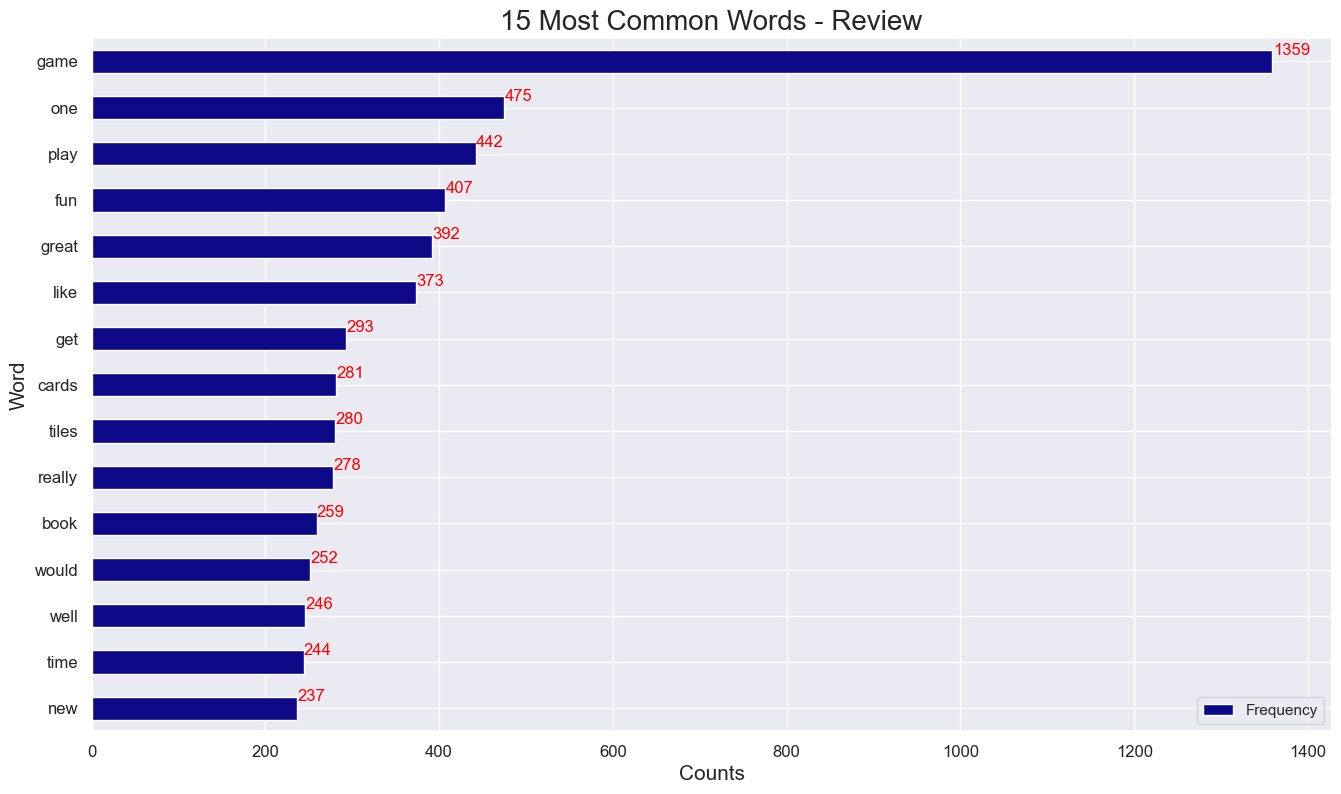

In [80]:
# Plot the counts
ax = counts_review.plot(kind='barh', figsize=(16, 9), fontsize=12,
                        colormap='plasma')

# Set the labels.
ax.set_xlabel('Counts', fontsize=15)
ax.set_ylabel('Word', fontsize=15)
ax.set_title("15 Most Common Words - Review",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')
ax.invert_yaxis()  

In [81]:
# Determine the 15 most common words for the summary column.
# View the frequency distribution.
freqdist1_summary = FreqDist(tokens_final_summary)

# View the ouput.
freqdist1_summary

FreqDist({'game': 268, 'great': 237, 'fun': 175, 'good': 84, 'love': 70, 'like': 54, 'kids': 48, 'book': 42, 'expansion': 42, 'cute': 40, ...})

In [82]:
# Generate a DataFrame from Counter.
counts_summary = pd.DataFrame(Counter(tokens_final_summary).most_common(15),
                              columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts_summary

Frequency
Word                
game             268
great            237
fun              175
good              84
love              70
like              54
kids              48
book              42
expansion         42
cute              40
old               34
really            30
set               29
nice              28
one               28

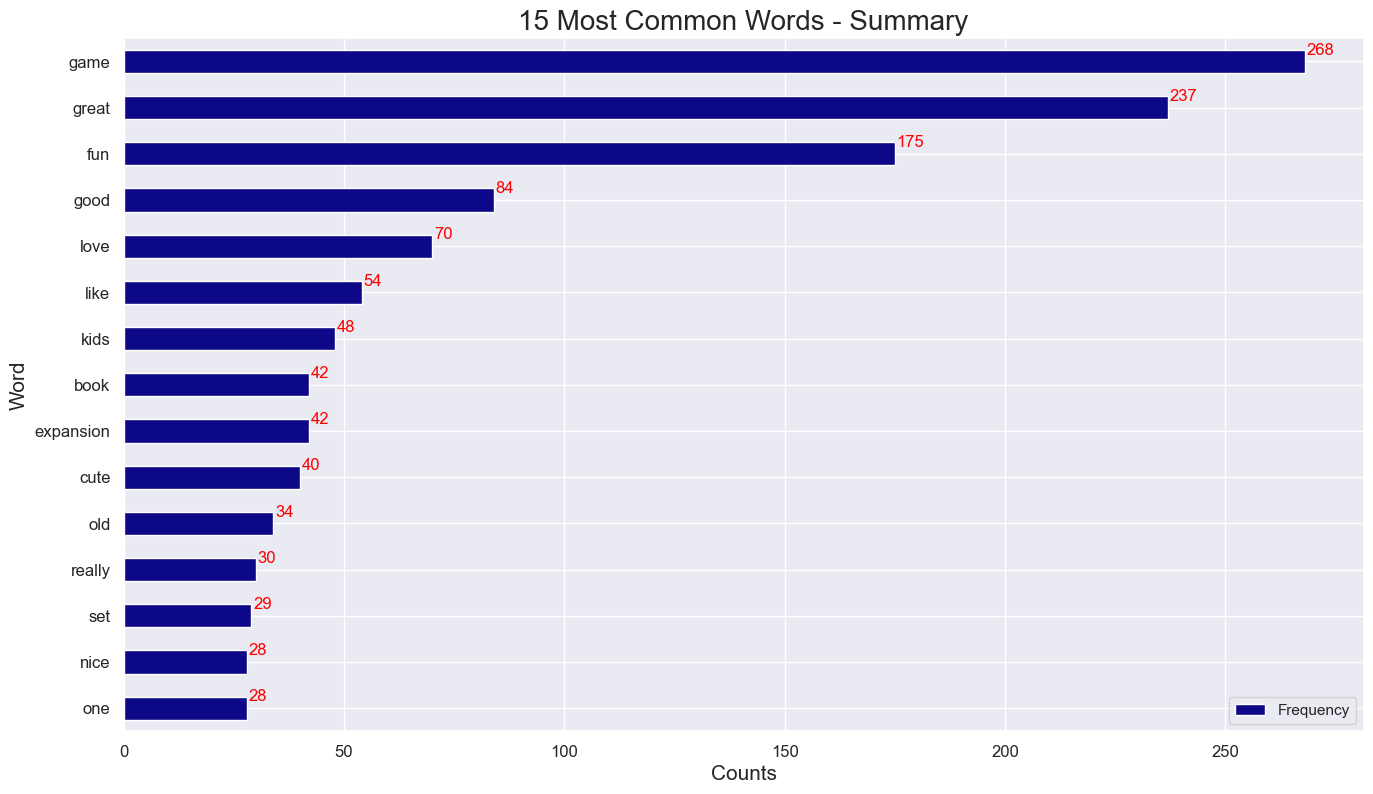

In [83]:
# Plot the counts
ax = counts_summary.plot(kind='barh', figsize=(16, 9), fontsize=12,
                        colormap='plasma')

# Set the labels.
ax.set_xlabel('Counts', fontsize=15)
ax.set_ylabel('Word', fontsize=15)
ax.set_title("15 Most Common Words - Summary", fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')
ax.invert_yaxis()    

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [84]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [85]:
# Determine polarity of both columns. 
# Create a new column for the polarity of the reviews.
df3['polarity_review'] = df3['review'].apply(generate_polarity)

# View output.
df3['polarity_review'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: polarity_review, dtype: float64

In [86]:
# Create a new column for the polarity of the summary.
df3['polarity_summary'] = df3['summary'].apply(generate_polarity)

# View output.
df3['polarity_summary'].head()

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: polarity_summary, dtype: float64

In [87]:
# View the output
df3.head()

review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  polarity_review  \
0  the fact that 50 of this space is wasted on ar...        -0.036111   
1  another worthless dungeon masters screen from ...         0.035952   
2                     pretty but also pretty useless         0.116640   
3                                         five stars         0.578788   
4                                         money trap        -0.316667   

   polarity_summary  
0              0.15  
1             -0.80  
2              0.00  
3              0.00  
4              0.00

Text(0.5, 1.0, 'Histogram of sentiment score polarity - Review')

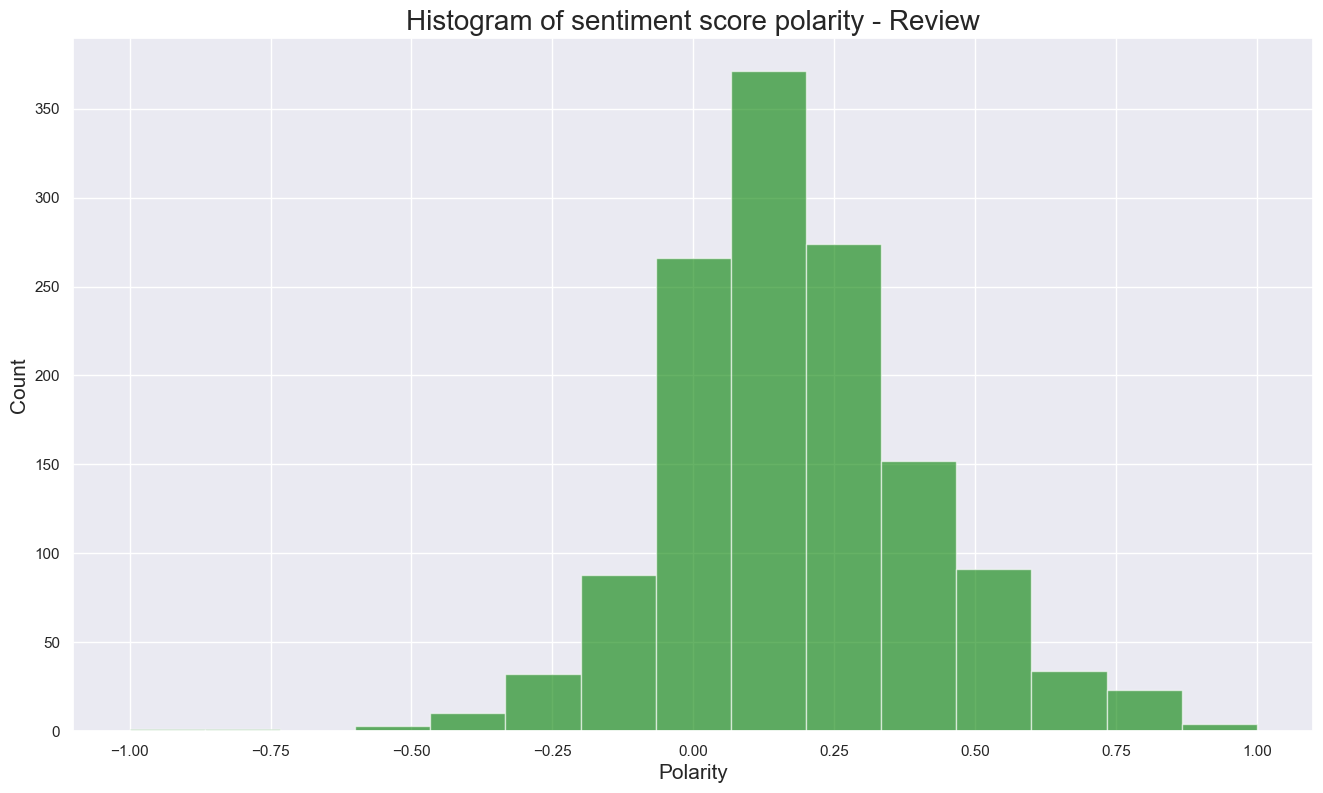

In [88]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity.
# Set the number of bins.
num_bins = 15

# Set the plot area
plt.figure(figsize=(16,9))

# Define the bars
n, bins, patches = plt.hist(df3['polarity_review'], num_bins, facecolor='green', alpha = 0.6)

# Set the labels
plt.xlabel('Polarity', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Histogram of sentiment score polarity - Review', fontsize=20)

Text(0.5, 1.0, 'Histogram of sentiment score polarity - Summary')

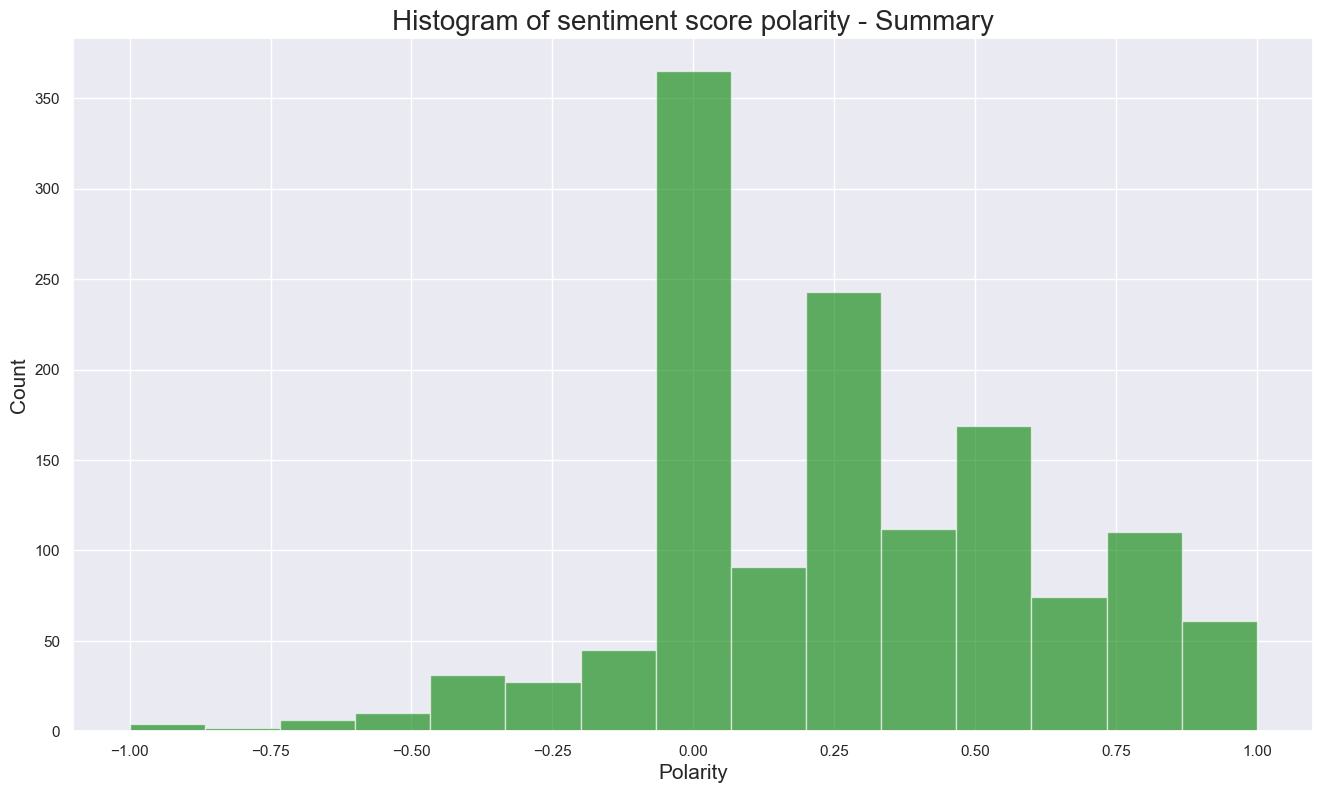

In [89]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity
# Set the number of bins.
num_bins = 15

# Set the plot area
plt.figure(figsize=(16,9))

# Define the bars
n, bins, patches = plt.hist(df3['polarity_summary'], num_bins, facecolor='green', alpha = 0.6)

# Set the labels
plt.xlabel('Polarity', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Histogram of sentiment score polarity - Summary', fontsize=20)

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [90]:
# Top 20 negative reviews.
# Create a DataFrame.
negative_reviews = df3.nsmallest(20, 'polarity_review')

# Eliminate unnecessary columns.
negative_reviews = negative_reviews[['review', 'polarity_review']]

# Adjust the column width.
negative_reviews.style.set_properties(subset=['review'], **{'width': '1200px'})

In [91]:
# Top 20 negative summaries.
# Create a DataFrame.
negative_summary = df3.nsmallest(20, 'polarity_summary')

# Eliminate unnecessary columns.
negative_summary = negative_summary[['summary', 'polarity_summary']]

# Adjust the column width.
negative_summary.style.set_properties(subset=['summary'], **{'width': '500px'})

In [92]:
# Top 20 positive reviews.
# Create a DataFrame.
positive_reviews = df3.nlargest(20, 'polarity_review')

# Eliminate unnecessary columns.
positive_reviews = positive_reviews[['review', 'polarity_review']]

# Adjust the column width.
positive_reviews.style.set_properties(subset=['review'], **{'width': '1200px'})

In [93]:
# Top 20 positive summaries.
# Create a DataFrame.
positive_summary = df3.nlargest(20, 'polarity_summary')

# Eliminate unnecessary columns.
positive_summary = positive_summary[['summary', 'polarity_summary']]

# Adjust the column width.
positive_summary.style.set_properties(subset=['summary'], **{'width': '500px'})

## 7. Discuss: Insights and observations

***Your observations here...***

After cleaning the data and removing stopwords and alphanumeric characters we see that the most common 15 words for 'Review' and 'Summary' columns show that these words are of a neutral or postivite sentiment. After visualising the sentiment score polarity we see that there are a few negative sentiments, however, the majority of the comments are either of a neutral or positive sentiment and this is evident in the histograms.

Upon further analysis and review of the negative cooments we see that some comments are deemed to be negative such as 'i bought this as a christmas gift for my grandson its a sticker book so how can i go wrong with this gift' has a negative polarity of -0.50 however reading this it has more of a neutral sentiment. This led to the belief even though the review isn't negative if it contains a negative word for e.g. 'wrong' in the above, it affects the polarity. There were a few more instances of neutral or positive reviews with 'negative words' that made the overall polarity negative even though the comment wasn't intended to be negative further investigation would need to conducted here.  

I have attached an article based on negative polarity levels for sentiment analysis.
https://www.researchgate.net/profile/Doaa-Mohey-El-Din/publication/313843559_Negative_Polarity_Levels_for_Sentiment_Analysis/links/58aa093692851cf0e3c6baa4/Negative-Polarity-Levels-for-Sentiment-Analysis.pdf

# 